# Let's take a look at the data we have

In [12]:
import h5py
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

root_path = Path.cwd().parent

with h5py.File(root_path / "data/lotka_volterra_data.h5", "r") as f:
    print("Datasets:", list(f.keys()))
    time_data = f["time"][:]
    traj_data = f["trajectories"][:]

print(time_data.shape)
print(traj_data.shape)

Datasets: ['time', 'trajectories']
(100,)
(1000, 100, 2)


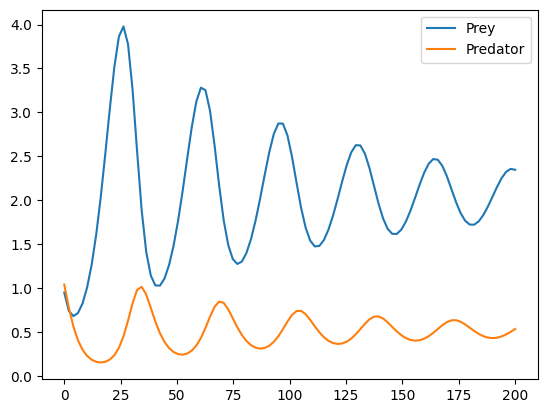

In [13]:
t = time_data
system = 0
prey = traj_data[system, :, 0]
predator = traj_data[system, :, 1]

plt.plot(t, prey, label="Prey")
plt.plot(t, predator, label="Predator")
plt.legend()
plt.show();

# We need to find a good choice of $\alpha$

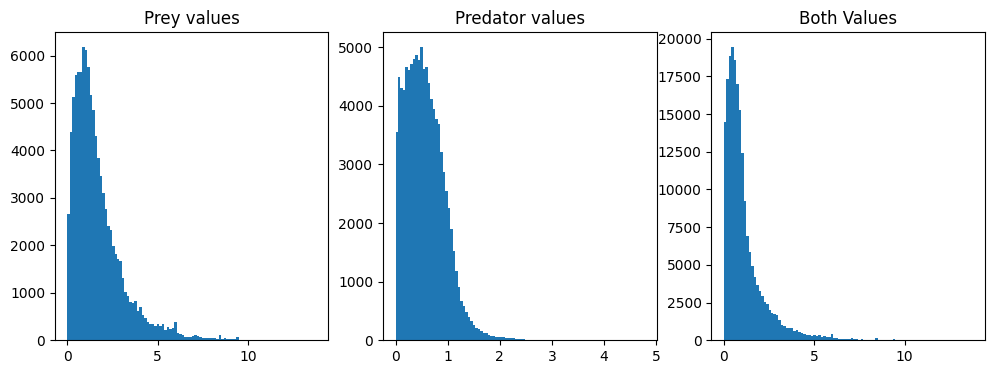

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

bins = 100
axs[0].hist(traj_data[:, :, 0].flatten(), bins=bins)
axs[0].set_title("Prey values")
axs[1].hist(traj_data[:, :, 1].flatten(), bins=bins)
axs[1].set_title("Predator values")
axs[2].hist(traj_data.flatten(), bins=bins)
axs[2].set_title("Both Values")

plt.show();

In [ ]:
all_numbers = traj_data.flatten()
upper_bound = 6
print(np.sum(all_numbers < upper_bound) / len(all_numbers))

0.990535


Upper Bound of about 6 leads to 99% inclusion in 1, 10. so we scale by $\alpha = \frac{6}{10}$.

$$
x_t' = \frac{x_t}{\alpha}
$$